In [1]:
"""
En este notebook hacemos la limpieza y Feature Eng. para el dataset de Autos para genrar un archivo limpio que utlizaremos 
a lo largo del proceso de ML para regresion.
"""

'\nEn este notebook hacemos la limpieza y Feature Eng. para el dataset de Autos para genrar un archivo limpio que utlizaremos \na lo largo del proceso de ML para regresion.\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import math as math

In [5]:
url = 'Automobile price data _Raw_.csv'
data = pd.read_csv(url)
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
## Eliminamos los guines de las columnas
data.columns = [str.replace('-','_') for str in data.columns]
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [8]:
## nos fijamos si existen valores faltantes que respondan al patron '?'
(data.astype(object)=='?').any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [16]:
## mostramos las columnas del tipo object que tienen faltante y contamos cuantos son los que faltan,
## vemos la cantidad de faltantes por columna que tenga el patron = '?'

for col in [x for x in data.columns if (data[x].astype(object)=='?').any()]:
    count = 0
    total = [count  + 1 for x in data[col] if x == '?'] 
    print(col + '  ' + str(sum(total)))

normalized_losses  41
num_of_doors  2
bore  4
stroke  4
horsepower  2
peak_rpm  2
price  4


In [24]:
## como normalized columns tiene muchos ?? eliminamos la columna entera y para las restantes eliminamos los registros faltantes.

#data.drop('normalized_losses', axis=1,inplace=True)

columnas = ['bore','stroke','horsepower','peak_rpm','price']

for col in columnas:
    data.loc[data[col]=='?',col]=np.nan
    data.dropna(axis=0,inplace=True)
    
## convertimos a numericos

for col in columnas:
    data[col]= pd.to_numeric(data[col])

In [26]:
## comprobamos los tipos de datos.
data.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [29]:
##Hacemos Feature ENG. Vemos que la columna num_of_cylinders esta desvalanceada. 
## vamos a unir algunas categorias.

data['num_of_cylinders'].value_counts()

four      153
six        24
five       10
eight       4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

In [30]:
##FEA ENG

FEA_cyl ={'three':'three_four', 'four':'three_four', 
                    'five':'five_six', 'six':'five_six',
                    'eight':'eight_twelve', 'twelve':'eight_twelve'}


data['num_of_cylinders'] = [FEA_cyl[x] for x in data['num_of_cylinders']] 
data['num_of_cylinders'].value_counts()

three_four      154
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

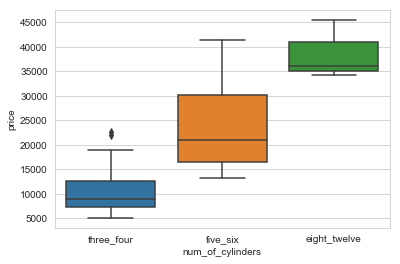

In [35]:
def crea_boxplot(data,x_col, y_col = 'price'):
    sea.set_style('whitegrid')
    sea.boxplot(x_col, y_col,data=data)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
    
crea_boxplot(data,'num_of_cylinders')    

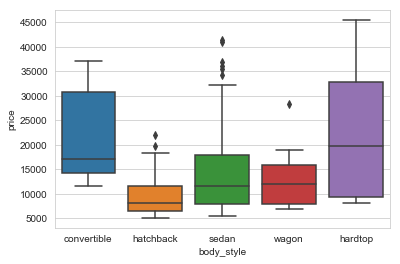

In [37]:
## vamos a ahcer FEA ENg sobre la columna Body_Style
data['body_style'].value_counts()
crea_boxplot(data,'body_style')

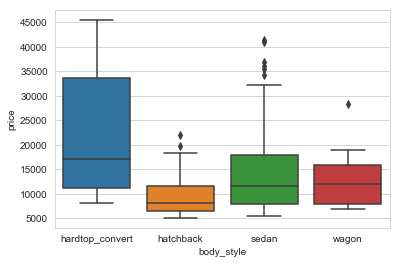

In [38]:
bodies = {'sedan':'sedan', 'hatchback':'hatchback', 'wagon':'wagon', 
             'hardtop':'hardtop_convert', 'convertible':'hardtop_convert'}
data['body_style']=[bodies[x] for x in data['body_style']]
data['body_style'].value_counts()
crea_boxplot(data,'body_style')

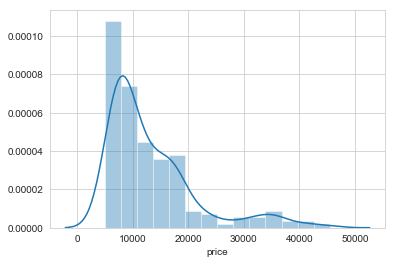

In [48]:
## transformaos la columna precio a escala logaritmica.

def crea_distplot(data,x_col, hist=True):
    sea.set_style('whitegrid')
    sea.distplot( data[x_col], hist=hist)
    plt.show()
    
crea_distplot(data,'price')

In [59]:
#data['price_log']= np.log(data['price'])
data['price_log'] = data['price'].apply(math.log)

## ambosmetodos son iguales, l segundo es mas performante para big data.

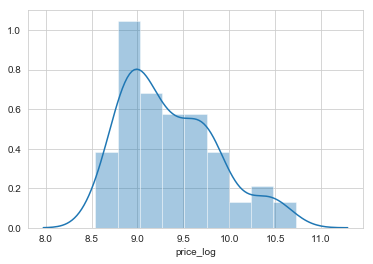

In [60]:
crea_distplot(data,'price_log')

In [61]:
data.shape

(193, 26)

In [76]:
def grafico_scatter_shape(data,cols, y_col = 'price_log', shape_col = 'fuel_type', alpha = 0.2):
    shape = ['x','o','+','*']
    categorias = data[shape_col].unique()
    for col in cols:
        sea.set_style('whitegrid')
        for idx,cat in enumerate(categorias):
            temp = data[data[shape_col]==cat]
            sea.regplot(col, y_col, data = temp, marker = shape[idx], label =cat,  color = 'blue',
                        scatter_kws={'alpha':alpha}, fit_reg = False)
        plt.legend()
        plt.show()
            

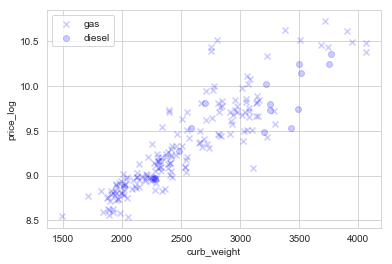

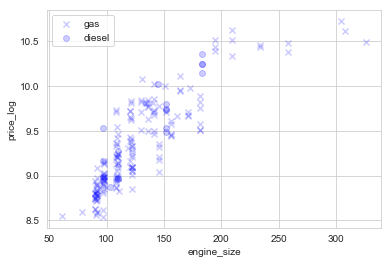

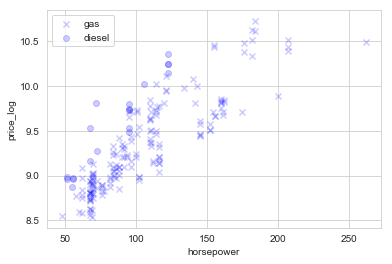

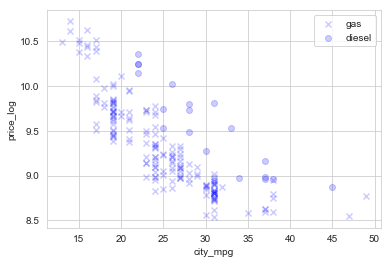

In [77]:
grafico_scatter_shape(data, ['curb_weight', 'engine_size', 'horsepower', 'city_mpg'])

In [79]:
## Guardamos el dataset final en un archivo que usaremos en los siuientes pasos.
## este dataset tiene una diferencia con el del curso, tiene dos registros menos porque EDX decidio 
## no eliminar ? de una cumna especifica.
data.to_csv('auto_prices_limpio.csv',header= True,index = False)